# DS 110 Final Project Code

# Pre-ML

## Preparation

In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import random


For next step, you will need to use the file flavors_of_cacao.csv.

If you don't have it locally, feel free to download it on [GitHub](https://github.com/SuzzukiW/chocolate-ratings-prediction-ml-model/blob/main/Datasets/flavors_of_cacao.csv).



In [ ]:
# Importing the dataset

from google.colab import files

uploaded = files.upload()


Saving flavors_of_cacao.csv to flavors_of_cacao.csv


In [ ]:
# Loading data

df = pd.read_csv("flavors_of_cacao.csv")


## Overview of the dataset

In [ ]:
# Have a look on the unprocessed data

df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [ ]:
df.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [ ]:
# A function for data overview

def basic_info(df):
    
    # Shape of the dataframe
    print("Number of Instances:",df.shape[0])
    print("Number of Features:",df.shape[1])
    
    # Summary Stats
    print("\nSummary Stats:")
    print(df.describe())
    
    # Missing Value
    print("\nMissing Values:")
    print(df.isna().sum())

    # Info for columns
    print("\nInfo for Columns:")
    print(df.columns)

basic_info(df)

Number of Instances: 1795
Number of Features: 9

Summary Stats:
               REF  Review\nDate       Rating
count  1795.000000   1795.000000  1795.000000
mean   1035.904735   2012.325348     3.185933
std     552.886365      2.927210     0.478062
min       5.000000   2006.000000     1.000000
25%     576.000000   2010.000000     2.875000
50%    1069.000000   2013.000000     3.250000
75%    1502.000000   2015.000000     3.500000
max    1952.000000   2017.000000     5.000000

Missing Values:
Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

Info for Columns:
Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 

# Data Cleansing

## Renaming columns

In [ ]:
# Checking name of the columns before renaming

df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [ ]:
# Renaming the columns

df.columns = ["Company", "Specific_Origin", "REF", "Review_Date", "Cocoa_Percent", "Location", "Rating", "Bean_Type", "Broad_Origin"]

df.head()

,Company,Specific_Origin,REF,Review_Date,Cocoa_Percent,Location,Rating,Bean_Type,Broad_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [ ]:
# Have a look at it after the renaming

df.sample()

,Company,Specific_Origin,REF,Review_Date,Cocoa_Percent,Location,Rating,Bean_Type,Broad_Origin
1696,Valrhona,Le Noir Amer,157,2007,71%,France,2.75,Forastero,West Africa


## Feature Engineering

### Rating

In this step, we will convert string to float for "Cocoa Percent" because Python won't be able to identify the special character like "%".

The percent sign (%) will be replaced with float number in Cocoa Percent.

In [ ]:
# Rewrite a function for converting Rating from string to float

# For exmaple, from '68%' to '68'

def removePercents(data):
    return data.apply(lambda x: float(x.strip('%')) / 100)


In [ ]:
df['Cocoa_Percent'] = removePercents(df['Cocoa_Percent'])

In [ ]:
df.sample()

,Company,Specific_Origin,REF,Review_Date,Cocoa_Percent,Location,Rating,Bean_Type,Broad_Origin
796,Heirloom Cacao Preservation (Millcreek),"Los Rios, Hacienda Limon, Orecao, 2015",1744,2016,0.7,U.S.A.,3.5,EET,Ecuador


### Company

In [ ]:
df["Company"] = df.Company.apply(lambda x: re.split("\(|aka ",x.rstrip(")"))[-1])

Only keep the ones with more than 20 observations - set the others to "other'"

In [ ]:
company = df[["Company","REF"]].groupby("Company").count().reset_index() # sort_values(by = "REF", ascending = False).reset_index()
company["New_Company"] = company.apply(lambda x: x.Company if x.REF > 20 else "Other", axis=1)
company

,Company,REF,New_Company
0,A. Morin,28,A. Morin
1,AMMA,6,Other
2,Acalli,2,Other
3,Adi,4,Other
4,Ah Cacao,1,Other
...,...,...,...
365,hello cocoa,2,Other
366,hexx,5,Other
367,iQ Chocolate,2,Other
368,organicfair,5,Other


In [ ]:
df = df.merge(company[["Company","New_Company"]], how = "left", on = "Company")

### Bean Type

Base on observations, the largest group has no category name, and encoded as '\xa0', then there are the Trinitario, Criollo, and Forastero cocoa beans.

Also, there is the blend category, plus several categories that specify two types of beans, plus some that appear to be identifying a sub-type.

To simplify this, we will create a new Bean Type feature (called New_Bean_Type) as follows:
- Convert NaNs and other empty strings to "Not specified"
- Convert categories with two bean types to "Blend". As there are quite a few Criollo blends (in particular Criollo/Trinitario) keep these separate from the other blends in case this is significant.
- Remove any sub-type.

In [ ]:
# Renoving subtype "Blend"

df['New_Bean_Type'] = df.Bean_Type.replace(np.nan, 'not-specified', regex=True).replace('\xa0', 'not-specified').apply(
    lambda x : ("Blend-Criollo" if "Criollo" in re.split(" |,|\)",str(x)) else "Blend") if any(
        word in x for word in ['Blend',',']) else x).apply(lambda x : (x.split()[0]))


In [ ]:
df.describe(exclude=[np.number])

,Company,Specific_Origin,Location,Bean_Type,Broad_Origin,New_Company,New_Bean_Type
count,1795,1795,1795,1794,1794,1795,1795
unique,370,1039,60,41,100,12,12
top,Soma,Madagascar,U.S.A.,,Venezuela,Other,not-specified
freq,47,57,764,887,214,1441,888


In [ ]:
# See what bean types we have now after this process

df.groupby('New_Bean_Type').New_Bean_Type.count()

New_Bean_Type
Amazon             3
Beniano            3
Blend             49
Blend-Criollo     52
CCN51              1
Criollo          171
EET                3
Forastero        194
Matina             3
Nacional           5
Trinitario       423
not-specified    888
Name: New_Bean_Type, dtype: int64

In [ ]:
df.sample()

,Company,Specific_Origin,REF,Review_Date,Cocoa_Percent,Location,Rating,Bean_Type,Broad_Origin,New_Company,New_Bean_Type
1452,Shark's,Hilo,713,2011,0.73,U.S.A.,2.0,,Hawaii,Other,not-specified


### Broad Origin and Specific Origin

Combining and fixing data in Broad Origin

In [ ]:
#

df["New_Origin"] = df.Broad_Origin.replace(np.nan, 'NA', regex=True).replace(
    '\xa0', 'NA').str.replace('Dom.*','Dominican Republic').str.replace('Ven.*','Venezuela').apply(
    lambda x: re.split(',|\(|\/|\&|\-',str(x))[0].rstrip().replace('Cost ','Costa ').replace('DR','Dominican Republic').replace(
        'Tobago','Trinidad').replace('Trinidad','Trinidad and Tobago').replace("Carribean","Caribbean"))

<ipython-input-20-4dd9b1a4f86a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["New_Origin"] = df.Broad_Origin.replace(np.nan, 'NA', regex=True).replace(


In [ ]:
# Sorting alphabetically

print(df.groupby('New_Origin').New_Origin.count().sort_index())

New_Origin
Africa           1
Australia        3
Belize          49
Bolivia         57
Brazil          58
              ... 
Uganda           8
Vanuatu          7
Venezuela      226
Vietnam         38
West Africa      6
Name: New_Origin, Length: 61, dtype: int64


In [ ]:
# 

df["New_Origin"] = df.New_Origin.apply(
    lambda x: x.replace('Gre.','Grenada').replace('Guat.','Guatemala').replace("Hawaii","United States of America").replace(
        'Mad.','Madagascar').replace('PNG','Papua New Guinea').replace('Principe','Sao Tome').replace(
        'Sao Tome','Sao Tome and Principe'))

print(df.groupby('New_Origin').New_Origin.count().sort_index())


New_Origin
Africa                        1
Australia                     3
Belize                       49
Bolivia                      57
Brazil                       58
Burma                         1
Cameroon                      1
Caribbean                     9
Central and S. America        4
Colombia                     43
Congo                        10
Costa Rica                   39
Cuba                         11
Dominican Republic          169
Ecuador                     195
El Salvador                   2
Fiji                          8
Gabon                         1
Ghana                        37
Grenada                      20
Guatemala                    29
Haiti                         9
Honduras                     15
India                         4
Indonesia                    17
Ivory Coast                   5
Jamaica                      20
Liberia                       3
Madagascar                  147
Malaysia                      3
Martinique                   

For next step, you will need to the download the file 'countryContinent' to import the dataset.

[Link to GitHub](https://github.com/SuzzukiW/chocolate-ratings-prediction-ml-model/blob/main/Datasets/countryContinent.csv)

In [ ]:
# Import Country to Continent dataset

from google.colab import files

uploaded = files.upload()


Saving countryContinent.csv to countryContinent.csv


In [ ]:
# Load Country to Continent dataset

ctoc_raw = pd.read_csv("countryContinent.csv", encoding='iso-8859-1') # format encoding for access


In [ ]:
# Accessing unique countries


countries = ctoc_raw[["country","sub_region","continent"]]
countries.country = countries.country.apply(lambda x: re.split("\(|\,",x)[0].rstrip())
countries = countries.drop_duplicates()
countries



/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,country,sub_region,continent
0,Afghanistan,Southern Asia,Asia
1,Åland Islands,Northern Europe,Europe
2,Albania,Southern Europe,Europe
3,Algeria,Northern Africa,Africa
4,American Samoa,Polynesia,Oceania
...,...,...,...
244,Wallis and Futuna,Polynesia,Oceania
245,Western Sahara,Northern Africa,Africa
246,Yemen,Western Asia,Asia
247,Zambia,Eastern Africa,Africa


In [ ]:
# Standard formatting

df["New_Origin"] = df["New_Origin"] = df.New_Origin.apply(
    lambda x: x.replace("St.","Saint").replace("Viet Nam","Vietnam").replace("Burma","Myanmar").replace(
        "Ivory Coast","Côte d'Ivoire").replace("West","Western").replace(" and S. "," "))
print(df.groupby('New_Origin').New_Origin.count().sort_index())

New_Origin
Africa                        1
Australia                     3
Belize                       49
Bolivia                      57
Brazil                       58
Cameroon                      1
Caribbean                     9
Central America               4
Colombia                     43
Congo                        10
Costa Rica                   39
Cuba                         11
Côte d'Ivoire                 5
Dominican Republic          169
Ecuador                     195
El Salvador                   2
Fiji                          8
Gabon                         1
Ghana                        37
Grenada                      20
Guatemala                    29
Haiti                         9
Honduras                     15
India                         4
Indonesia                    17
Jamaica                      20
Liberia                       3
Madagascar                  147
Malaysia                      3
Martinique                    1
Mexico                       

In [ ]:
# Merge the chocolate and countries dataframes to set a sub_region for each country (final merging)

df = df.merge(countries[["country","sub_region"]], how = "left", left_on= "New_Origin", right_on="country")
df[df.country.isnull()].groupby("New_Origin").New_Origin.count().sort_index()

New_Origin
Africa              1
Caribbean           9
Central America     4
NA                 74
South America       4
Vietnam            38
Western Africa      6
Name: New_Origin, dtype: int64

In [ ]:
# Fix data for Hawaii (state > country)

df.loc[df.New_Origin == "Hawaii","country"] = "United States of America"
df.loc[df.New_Origin == "Hawaii","sub_region"] = "Northern America"

df.loc[df.country.isnull(),"sub_region"] = df.loc[df.country.isnull(),"New_Origin"]
df.loc[df.country.isnull(),"country"] = "--"

In [ ]:
# Fix data for Africa

regions = countries[["sub_region","continent"]].drop_duplicates()
df = df.merge(regions, how="left", on="sub_region")
df.loc[df.New_Origin=='Africa',"continent"] = 'Africa'
df.continent = df.continent.replace(np.nan,"other")

In [ ]:
print(df[["continent","sub_region","country","New_Origin"]].groupby(["continent","sub_region","country"]).count())

                                                              New_Origin
continent sub_region                country                             
Africa    Africa                    --                                 1
          Eastern Africa            Madagascar                       147
                                    Tanzania                          34
                                    Uganda                             8
          Middle Africa             Cameroon                           1
                                    Congo                             10
                                    Gabon                              1
                                    Sao Tome and Principe             18
          Western Africa            --                                 6
                                    Côte d'Ivoire                      5
                                    Ghana                             37
                                    Liberia        

In [ ]:
# Setting all the small country categories to the sub_region

dfCounts = df[["New_Origin","REF"]].groupby(["New_Origin"]).count()
dfCounts.columns = ["countryCount"]
dfRollup = df.merge(dfCounts, how="left", left_on="New_Origin", right_index=True)[["New_Origin","sub_region","countryCount"]]
df.Origin = dfRollup.apply(lambda x: x.sub_region if x.countryCount < 28 else x.New_Origin, axis=1)

# 
print(df[["continent","sub_region","country","New_Origin"]].groupby(["continent","sub_region","New_Origin"]).count())

                                                              country
continent sub_region                New_Origin                       
Africa    Africa                    Africa                          1
          Eastern Africa            Madagascar                    147
                                    Tanzania                       34
                                    Uganda                          8
          Middle Africa             Cameroon                        1
                                    Congo                          10
                                    Gabon                           1
                                    Sao Tome and Principe          18
          Western Africa            Côte d'Ivoire                   5
                                    Ghana                          37
                                    Liberia                         3
                                    Nigeria                         1
                    

<ipython-input-31-17b398e0fdd5>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Origin = dfRollup.apply(lambda x: x.sub_region if x.countryCount < 28 else x.New_Origin, axis=1)


In [ ]:
# Repeat this process

dfCounts = df[["New_Origin","REF"]].groupby(["New_Origin"]).count()
dfCounts.columns = ["countryCount"]
dfRollup = df.merge(dfCounts, how="left", left_on="New_Origin", right_index=True)[["New_Origin","continent","countryCount"]]
df.New_Origin = dfRollup.apply(lambda x: x.continent if x.countryCount < 28 else x.New_Origin, axis=1)


print(df[["continent","country","New_Origin"]].groupby(["continent","New_Origin"]).count())

print(df[["continent","sub_region","country","New_Origin"]].groupby(["continent","sub_region","New_Origin"]).count())

                                    country
continent New_Origin                       
Africa    Africa                         57
          Ghana                          37
          Madagascar                    147
          Tanzania                       34
Americas  Americas                      115
          Belize                         49
          Bolivia                        57
          Brazil                         58
          Colombia                       43
          Costa Rica                     39
          Dominican Republic            169
          Ecuador                       195
          Guatemala                      29
          Mexico                         30
          Nicaragua                      60
          Peru                          172
          Trinidad and Tobago            39
          United States of America       28
          Venezuela                     226
Asia      Asia                           32
Oceania   Oceania               

In [ ]:
#

print(df.loc[df.Origin.str.contains("America"),["New_Origin","Broad_Origin","country"]].groupby(["New_Origin","Broad_Origin"]).count())

                                                 country
New_Origin               Broad_Origin                   
Americas                 Central and S. America        4
                         El Salvador                   2
                         Honduras                     15
                         Panama                        7
                         South America                 3
                         South America, Africa         1
                         Suriname                      1
United States of America Hawaii                       28


In [ ]:
# 

df.loc[df.New_Origin.isin(["Americas","Central America"]),"New_Origin"] = "Central and South America"
print(df[["continent","country","New_Origin"]].groupby(["continent","New_Origin"]).count())

                                     country
continent New_Origin                        
Africa    Africa                          57
          Ghana                           37
          Madagascar                     147
          Tanzania                        34
Americas  Belize                          49
          Bolivia                         57
          Brazil                          58
          Central and South America      115
          Colombia                        43
          Costa Rica                      39
          Dominican Republic             169
          Ecuador                        195
          Guatemala                       29
          Mexico                          30
          Nicaragua                       60
          Peru                           172
          Trinidad and Tobago             39
          United States of America        28
          Venezuela                      226
Asia      Asia                            32
Oceania   

### Revamp the dataframe

In [ ]:
df = df.loc[:,["Rating", "Cocoa_Percent", "New_Company", "New_Bean_Type", "New_Origin"]]
df.columns = ["Rating","Cocoa_Percent","Company","Bean_Type", "New_Origin"]
df.dtypes

Rating           float64
Cocoa_Percent    float64
Company           object
Bean_Type         object
New_Origin        object
dtype: object

In [ ]:
df.head()

,Rating,Cocoa_Percent,Company,Bean_Type,New_Origin
0,3.75,0.63,A. Morin,not-specified,Africa
1,2.75,0.70,A. Morin,not-specified,Africa
2,3.00,0.70,A. Morin,not-specified,Africa
3,3.50,0.70,A. Morin,not-specified,Africa
4,3.50,0.70,A. Morin,not-specified,Peru


In [ ]:
df.sample()

,Rating,Cocoa_Percent,Company,Bean_Type,New_Origin
958,3.5,0.7,Other,not-specified,Central and South America


## Dealing with missing values (Deprecated)

Find out what happens to missing values in the column 'bean'.

In [ ]:
# Having a look into the missing values

df[['Bean_Type']].head()

# df[['Bean_Type', 'Broad_Bean_Origin']].head()



,Bean_Type
0,not-specified
1,not-specified
2,not-specified
3,not-specified
4,not-specified


In [ ]:
# However from the output above, it seems like we have even more missing values
# So, right here, we are trying to have a look on all the missing values

df['Bean_Type'].value_counts().head() # The number of missing values is 887

not-specified    888
Trinitario       423
Forastero        194
Criollo          171
Blend-Criollo     52
Name: Bean_Type, dtype: int64

In [ ]:
# Having a look at what the missing values are encoded as

list(df['Bean_Type'][0:5]) # These missing values are encoded as "\xa0"

['not-specified',
 'not-specified',
 'not-specified',
 'not-specified',
 'not-specified']

In [ ]:
# Here is a function to replace all the missing values with "None"

def replace_missing_values(value_x):
  if(value_x is "\xa0"):
    return None


<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-41-2c60da86d186>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(value_x is "\xa0"):


In [ ]:
# Using ".apply" to apply a function along an axis of the DataFrame

df['Bean_Type'] = df['Bean_Type'].apply(replace_missing_values)


In [ ]:
# View the dataset after replace missing values with "None"

df.head()

,Rating,Cocoa_Percent,Company,Bean_Type,New_Origin
0,3.75,0.63,A. Morin,None,Africa
1,2.75,0.70,A. Morin,None,Africa
2,3.00,0.70,A. Morin,None,Africa
3,3.50,0.70,A. Morin,None,Africa
4,3.50,0.70,A. Morin,None,Peru


In [ ]:
df.sample()

,Rating,Cocoa_Percent,Company,Bean_Type,New_Origin
1377,4.0,0.75,Other,None,Madagascar


In [ ]:
# Final check for the data types before we head to the ML part (Exciting!)

df.dtypes

Rating           float64
Cocoa_Percent    float64
Company           object
Bean_Type         object
New_Origin        object
dtype: object

# Data Splitting & Get Dummies

## Traning & Testing Data

In [ ]:
# Randomly select 20% of the data and set aside as the test data

random.seed(12345) # 
# The purpose of this line of code is to make the random number predictable

testSize = len(df) // 5 # Set the testIndices to a random sample of the length of the dataframe
testIndices = random.sample(range(len(df)),testSize) # A list of random indices
testIndices.sort() # Sort the testIndices


In [ ]:
# Set the test dataframe to the rows with the indices in testIndices

dfTest = df.iloc[testIndices,]

# Display

print("Test data set has {} observations and {} attributes".format(dfTest.shape[0],dfTest.shape[1]))

Test data set has 359 observations and 5 attributes


In [ ]:
# Then, the rest of the data will be sed to train the model

dfTrain = df.drop(testIndices)

# Display

print("Training data set has {} observations and {} attributes".format(dfTrain.shape[0],dfTrain.shape[1]))

Training data set has 1436 observations and 5 attributes


## Get Dummies

As model expect all the attributes to be numeric, therefore in this section, we will convert the categorical features to dummy variables.

In [ ]:
# Get dummies for the training data
X_train = pd.get_dummies(dfTrain.iloc[:,1:])

# Get the target variable (Rating) from the training data
y_train = dfTrain.Rating

print("Training data set has {} observations and {} attributes".format(X_train.shape[0],X_train.shape[1]))

# Get dummies for the testing data
X_test = pd.get_dummies(dfTest.iloc[:,1:])

# Get the target variable (Rating) from the testing data
y_test = dfTest.Rating

print("Test data set has {} observations and {} attributes".format(X_test.shape[0],X_test.shape[1]))


Training data set has 1436 observations and 37 attributes
Test data set has 359 observations and 37 attributes


# Decision Tree Regression



In [ ]:
# Import the libraries

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import _tree


In [ ]:
# Create the Decision Tree Regressor

dtm = tree.DecisionTreeRegressor(max_depth = 5)
dtm.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=5)

In [ ]:
# This is a function to representing the decision tree model as a function
# tree: decision tree model: the decision tree to represent as a function
# feature_names: list: The feature names of the dataset used for building the decision tree

# Citation: Matthew Mayo, KDnuggets


def dtmToCode(tree, feature_names):

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    print("def tree({}):".format(", ".join(feature_names)))

    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)



In [ ]:
# Turning decision tree into a function

dtmToCode(dtm, X_train.columns)

def tree(Cocoa_Percent, Company_A. Morin, Company_Arete, Company_Bonnat, Company_Coppeneur, Company_Domori, Company_Felchlin, Company_Fresco, Company_Guittard, Company_Other, Company_Pralus, Company_Soma, Company_Valrhona, New_Origin_Africa, New_Origin_Asia, New_Origin_Belize, New_Origin_Bolivia, New_Origin_Brazil, New_Origin_Central and South America, New_Origin_Colombia, New_Origin_Costa Rica, New_Origin_Dominican Republic, New_Origin_Ecuador, New_Origin_Ghana, New_Origin_Guatemala, New_Origin_Madagascar, New_Origin_Mexico, New_Origin_NA, New_Origin_Nicaragua, New_Origin_Oceania, New_Origin_Papua New Guinea, New_Origin_Peru, New_Origin_Tanzania, New_Origin_Trinidad and Tobago, New_Origin_United States of America, New_Origin_Venezuela, New_Origin_Vietnam):
  if Cocoa_Percent <= 0.9050000011920929:
    if Company_Other <= 0.5:
      if Company_Soma <= 0.5:
        if Cocoa_Percent <= 0.8350000083446503:
          if Company_Coppeneur <= 0.5:
            return [[3.38221154]]
          

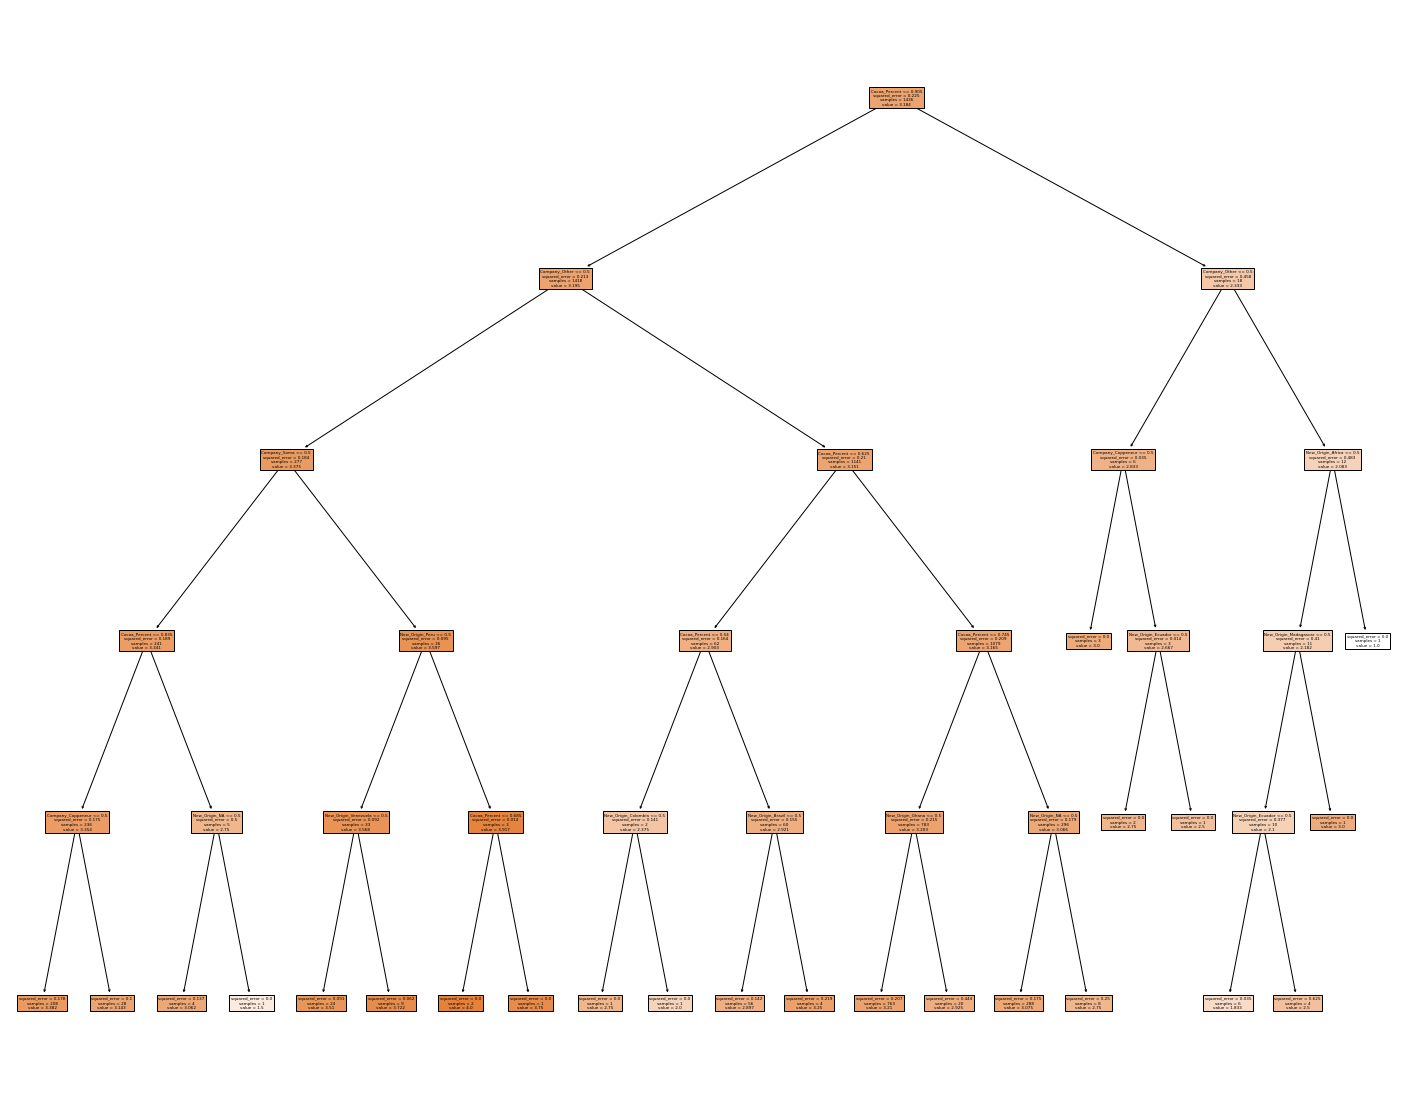

In [ ]:
# Use matplotlib to plot the tree for original dtm

from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtm,
                     feature_names = X_train.columns,
                        class_names = y_train,
                        filled = True)

## Parameter Tuning for DTM

In [ ]:
# Using the GridSearchCV module to help us find the optimal parameter values from a given set of parameters in a grid.

from sklearn.model_selection import GridSearchCV 

random.seed(8765)

# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [8, 10, 12],
    'max_features': [8, 9, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
    'splitter': ['best', 'random']
}

# Create a based model

dtr = tree.DecisionTreeRegressor(max_depth=5)

# Instantiate the grid search model

dt_grid = GridSearchCV(estimator = dtr, param_grid = param_grid, 
                           cv = 10, n_jobs = -1, verbose = 2)

dt_grid.fit(X_train, y_train)
optimized_dtm = dt_grid.best_estimator_
dt_grid.best_params_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


{'max_depth': 8,
 'max_features': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'splitter': 'best'}

In [ ]:
dtmToCode(optimized_dtm, X_train.columns)

def tree(Cocoa_Percent, Company_A. Morin, Company_Arete, Company_Bonnat, Company_Coppeneur, Company_Domori, Company_Felchlin, Company_Fresco, Company_Guittard, Company_Other, Company_Pralus, Company_Soma, Company_Valrhona, New_Origin_Africa, New_Origin_Asia, New_Origin_Belize, New_Origin_Bolivia, New_Origin_Brazil, New_Origin_Central and South America, New_Origin_Colombia, New_Origin_Costa Rica, New_Origin_Dominican Republic, New_Origin_Ecuador, New_Origin_Ghana, New_Origin_Guatemala, New_Origin_Madagascar, New_Origin_Mexico, New_Origin_NA, New_Origin_Nicaragua, New_Origin_Oceania, New_Origin_Papua New Guinea, New_Origin_Peru, New_Origin_Tanzania, New_Origin_Trinidad and Tobago, New_Origin_United States of America, New_Origin_Venezuela, New_Origin_Vietnam):
  if Company_Soma <= 0.5:
    if Company_Felchlin <= 0.5:
      if Company_Other <= 0.5:
        if Cocoa_Percent <= 0.8350000083446503:
          if Company_Coppeneur <= 0.5:
            if New_Origin_Peru <= 0.5:
              if 

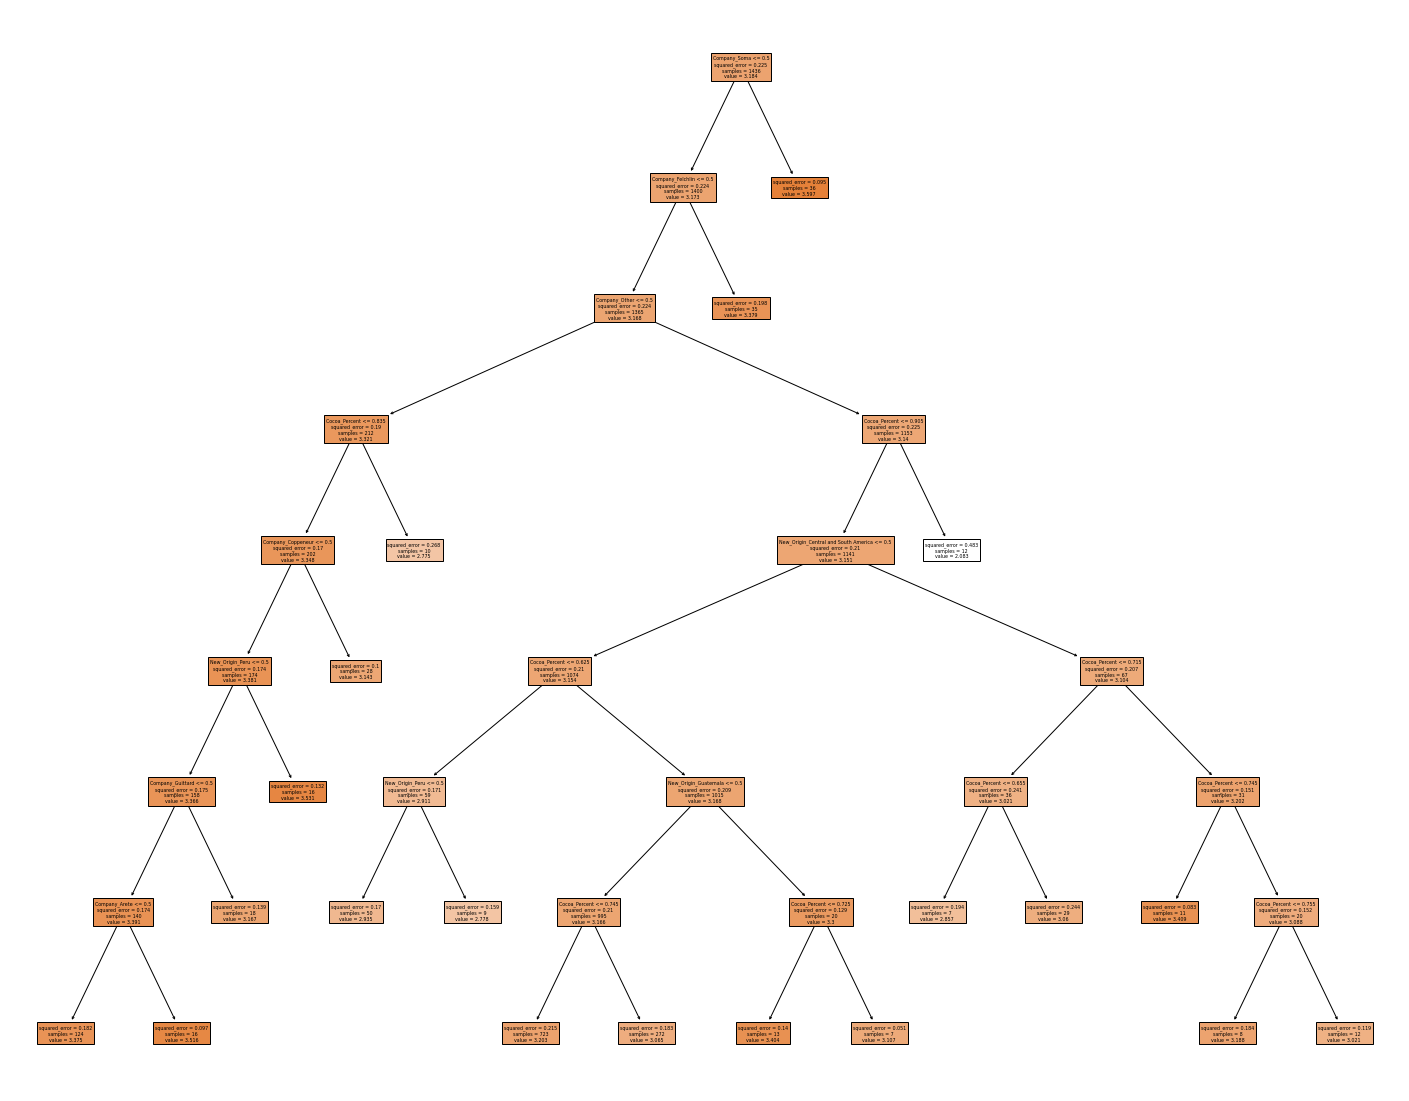

In [ ]:
# Use matplotlib to plot the tree for optimized dtm

from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
_ = tree.plot_tree(optimized_dtm,
                        feature_names = X_train.columns,
                        class_names = y_train,
                        filled = True)

In [ ]:
# Compare the results from original decision tree model to modified decision tree model

decision_tree_results = pd.DataFrame(y_train[0:20])
decision_tree_results["Original DTM"] = np.round(dtm.predict(X_train.iloc[0:20])*4)/4
decision_tree_results["Modified DTM"] = np.round(optimized_dtm.predict(X_train.iloc[0:20])*4)/4
decision_tree_results


,Rating,Original DTM,Modified DTM
0,3.75,3.50,3.50
1,2.75,3.50,3.50
2,3.00,3.50,3.50
3,3.50,3.50,3.50
5,2.75,3.50,3.50
8,3.75,3.50,3.50
9,4.00,3.50,3.50
10,2.75,3.50,3.50
11,3.00,3.50,3.50
12,3.25,3.50,3.50


#Random Forest Regression

In [ ]:
# Import libraries

from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create the random forest regressor

rfm = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfm.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

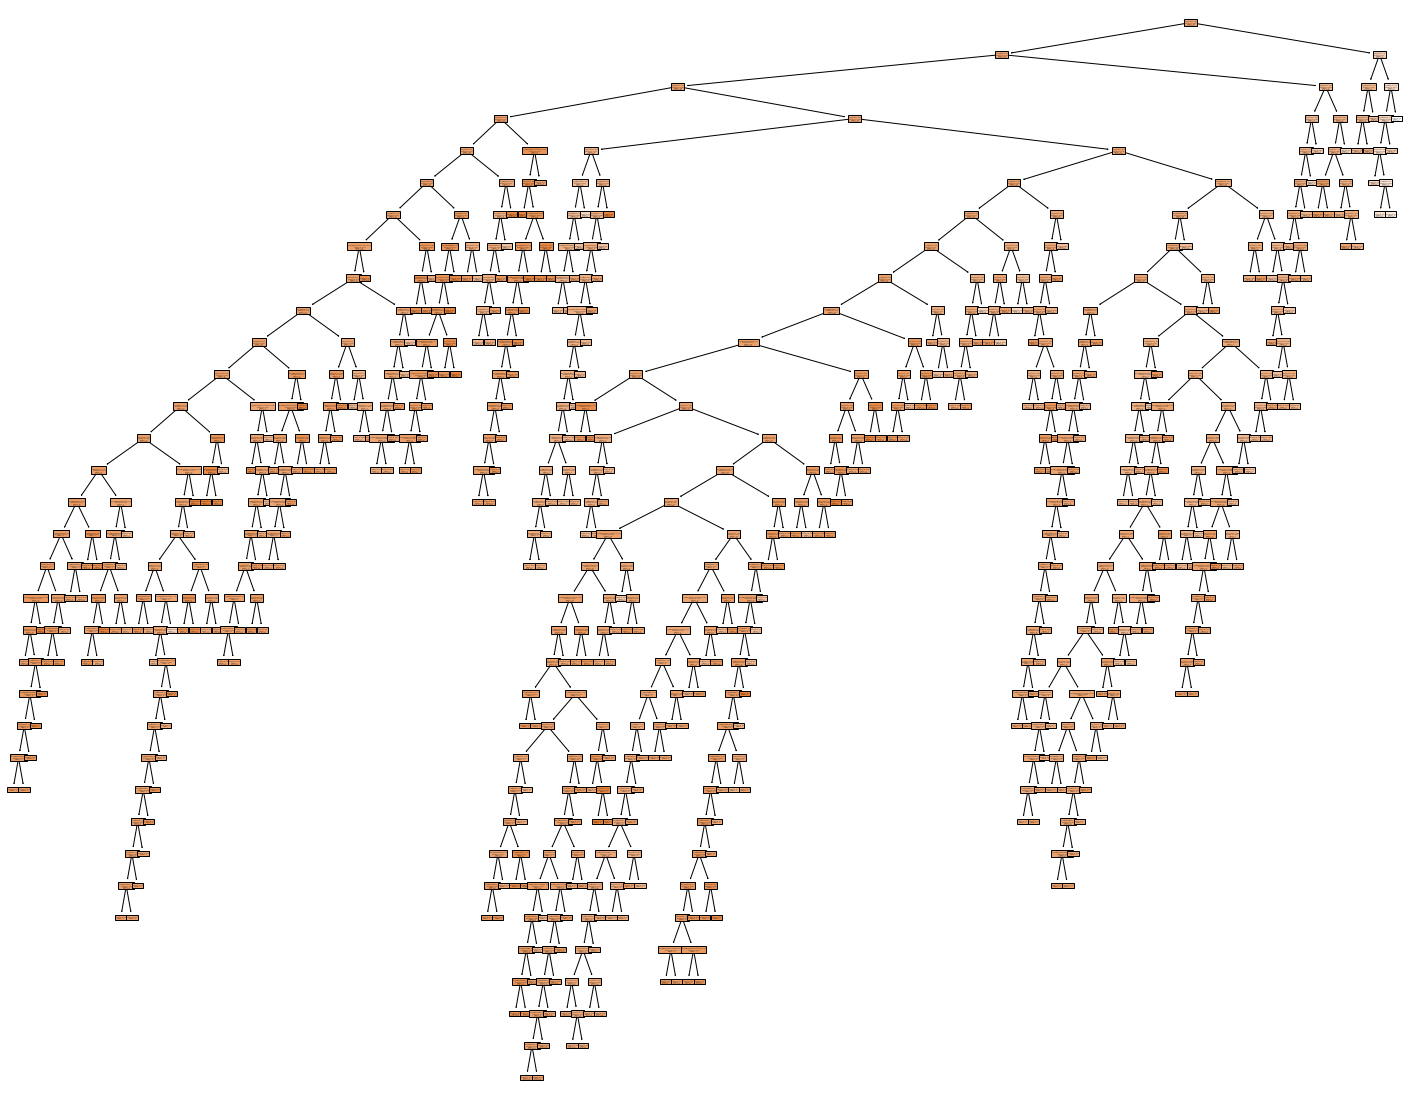

In [ ]:
# Use matplotlib to plot the tree

from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
_ = tree.plot_tree(rfm.estimators_[0],
                        feature_names = X_train.columns,
                        class_names = y_train,
                        filled = True)

In [ ]:
# Compare the results from original decision tree model to random forest model

decision_tree_results["Original RFM"] = np.round(rfm.predict(X_train.iloc[0:20])*4)/4
decision_tree_results


,Rating,Original DTM,Modified DTM,Original RFM
0,3.75,3.50,3.50,3.50
1,2.75,3.50,3.50,3.00
2,3.00,3.50,3.50,3.00
3,3.50,3.50,3.50,3.00
5,2.75,3.50,3.50,3.50
8,3.75,3.50,3.50,3.50
9,4.00,3.50,3.50,3.50
10,2.75,3.50,3.50,2.75
11,3.00,3.50,3.50,3.00
12,3.25,3.50,3.50,3.25


## Parameter tuning for RFM
Notes: the following code will take a little while to run.

In [ ]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'bootstrap': [True],
    'max_depth': [15, 20, 25],
    'max_features': [6, 8, 10],
    'min_samples_leaf': [2],
    'min_samples_split': [10],
    'n_estimators': [100, 200, 800]
}

# Create a based model

rf = RandomForestRegressor()

# Instantiate the grid search model

rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

rf_grid.fit(X_train, y_train)

optimized_rfm = rf_grid.best_estimator_

rf_grid.best_params_

Fitting 10 folds for each of 27 candidates, totalling 270 fits


{'bootstrap': True,
 'max_depth': 15,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

# Rating Predictions

In [ ]:
# Predict the ratings for the test set using the optimized decision tree model

y_pred = optimized_dtm.predict(X_test)

# Create a dataframe to compare the actual ratings to the predicted ratings

predictions = pd.DataFrame(y_test)
predictions["Predicted"] = np.round(y_pred*4)/4
predictions


,Rating,Predicted
4,3.50,3.50
6,3.50,3.50
7,3.50,3.50
13,3.75,3.50
19,3.50,3.50
...,...,...
1766,3.00,3.00
1786,3.25,3.00
1788,3.25,3.25
1793,3.25,3.00


In [ ]:
# Predict the ratings for the test set using the optimized random forest model

y_pred = optimized_rfm.predict(X_test)

# Create a dataframe to compare the actual ratings to the predicted ratings

predictions = pd.DataFrame(y_test)
predictions["Predicted"] = np.round(y_pred*4)/4
predictions


,Rating,Predicted
4,3.50,3.25
6,3.50,3.25
7,3.50,3.25
13,3.75,3.25
19,3.50,3.25
...,...,...
1766,3.00,2.75
1786,3.25,3.00
1788,3.25,3.25
1793,3.25,3.00


# Model Evaluations

In [ ]:
# Import the libraries

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# A function to evaluate the optimized decision tree model

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    rmse = np.sqrt(mean_squared_error(test_labels, predictions)) # Shows how far predictions fall from measured true values using Euclidean distance
    r2 = r2_score(test_labels, predictions)
    print('Model Performance\n')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('RMSE = {:0.2f}.'.format(rmse))
    print('R2 = {:0.2f}.'.format(r2))
    return accuracy


In [ ]:
# Evaluate the original decision tree model

base_accuracy = evaluate(dtm, X_test, y_test)

Model Performance

Average Error: 0.3710 degrees.
Accuracy = 87.13%.
RMSE = 0.47.
R2 = 0.09.


In [ ]:
# Evaluate the optimized decision tree model

base_accuracy = evaluate(optimized_dtm, X_test, y_test)

Model Performance

Average Error: 0.3678 degrees.
Accuracy = 87.33%.
RMSE = 0.46.
R2 = 0.13.


In [ ]:
# Evaluate the original random forest model

base_accuracy = evaluate(rfm, X_test, y_test)

Model Performance

Average Error: 0.3821 degrees.
Accuracy = 86.87%.
RMSE = 0.48.
R2 = 0.05.


In [ ]:
# Evaluate the optimized random forest model

base_accuracy = evaluate(optimized_rfm, X_test, y_test)

Model Performance

Average Error: 0.3658 degrees.
Accuracy = 87.35%.
RMSE = 0.45.
R2 = 0.14.


In [ ]:
# Does the optimized decision tree model perform better than the optimized random forest model?

# Create a dataframe to compare the results from both models

model_results = pd.DataFrame({"Decision Tree": np.round(optimized_dtm.predict(X_test.iloc[0:20])*4)/4,
                                "Random Forest": np.round(optimized_rfm.predict(X_test.iloc[0:20])*4)/4})
model_results

# The optimized decision tree model performs better than the optimized random forest model.
# The optimized decision tree model has a higher accuracy, lower RMSE, and higher R2 score.

,Decision Tree,Random Forest
0,3.50,3.25
1,3.50,3.25
2,3.50,3.25
3,3.50,3.25
4,3.50,3.25
5,3.50,3.50
6,3.25,3.25
7,3.00,3.25
8,3.25,3.25
9,3.25,3.25


# Determine which columns will have the greatest impact on chocolate bar ratings prediction


In [ ]:
# Create a dataframe to store the feature importance

feature_importance = pd.DataFrame({"Feature": X_train.columns,
                                    "Importance": optimized_dtm.feature_importances_})
feature_importance


,Feature,Importance
0,Cocoa_Percent,0.603291
1,Company_A. Morin,0.000000
2,Company_Arete,0.006461
3,Company_Bonnat,0.000000
4,Company_Coppeneur,0.031467
5,Company_Domori,0.000000
6,Company_Felchlin,0.034840
7,Company_Fresco,0.000000
8,Company_Guittard,0.018516
9,Company_Other,0.134781


In [ ]:
# Sort the dataframe by importance

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
feature_importance


,Feature,Importance
0,Cocoa_Percent,0.603291
11,Company_Soma,0.145348
9,Company_Other,0.134781
6,Company_Felchlin,0.034840
4,Company_Coppeneur,0.031467
8,Company_Guittard,0.018516
31,New_Origin_Peru,0.013548
24,New_Origin_Guatemala,0.008167
2,Company_Arete,0.006461
18,New_Origin_Central and South America,0.003580


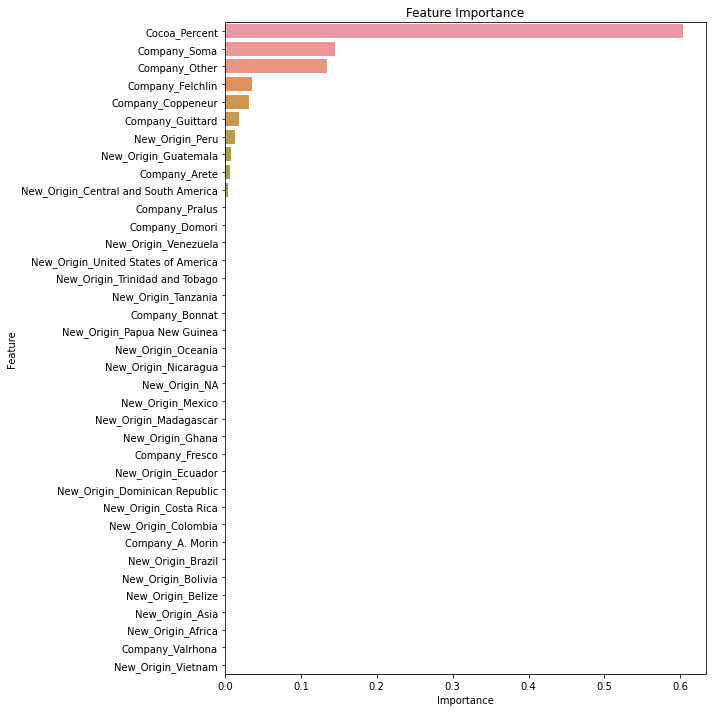

In [ ]:
# Plot the feature importance

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# The top 3 features that will have the greatest impact on chocolate bar ratings prediction are:
# 1. Cocoa_Percent
# 2. Company
# 3. Bean_Type


## test 1

In [ ]:
# A function to plot the features importances

import seaborn as sns
import matplotlib.pyplot as plt 

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    sns.barplot(x=model.feature_importances_, y=X_train.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title("Top 3 features that will have the greatest impact on chocolate bar ratings prediction")
    plt.show()
    print("Top 3 features that will have the greatest impact on chocolate bar ratings prediction:")
    print(X_train.columns.values[np.argsort(model.feature_importances_)[::-1][:3]])


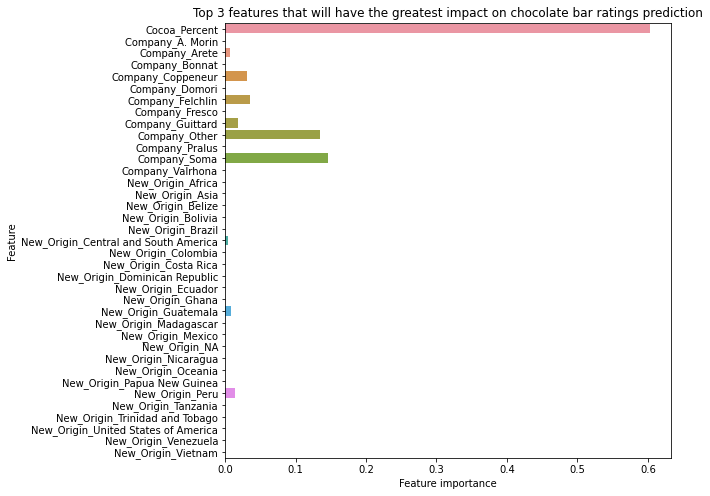

Top 3 features that will have the greatest impact on chocolate bar ratings prediction:
['Cocoa_Percent' 'Company_Soma' 'Company_Other']


In [ ]:
# Plot the feature importance for the optimized decision tree model

plot_feature_importances(optimized_dtm)

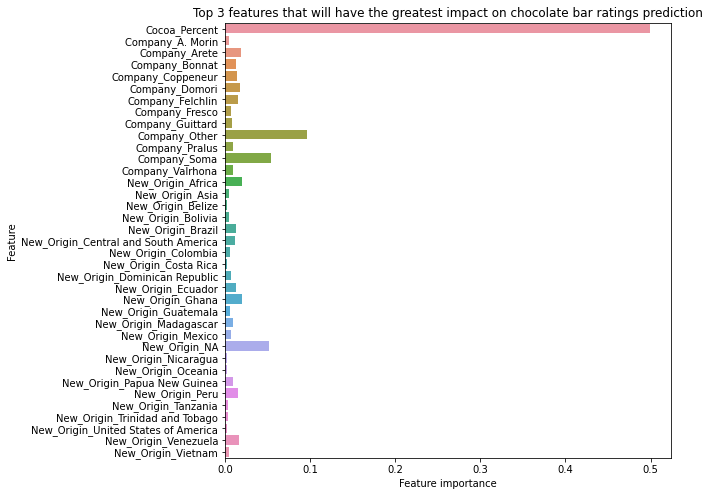

Top 3 features that will have the greatest impact on chocolate bar ratings prediction:
['Cocoa_Percent' 'Company_Other' 'Company_Soma']


In [ ]:
# Plot the feature importance for the optimized random forest model

plot_feature_importances(optimized_rfm)

## test 2

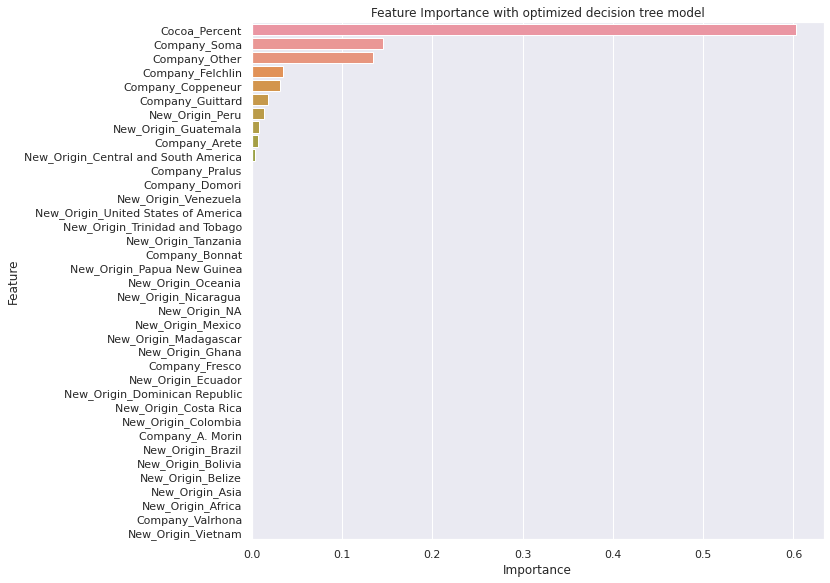

The top 3 columns that will have the greatest impact on chocolate bar ratings prediction using the optimized decision tree model are: 

          Feature  Importance
0   Cocoa_Percent    0.603291
11   Company_Soma    0.145348
9   Company_Other    0.134781




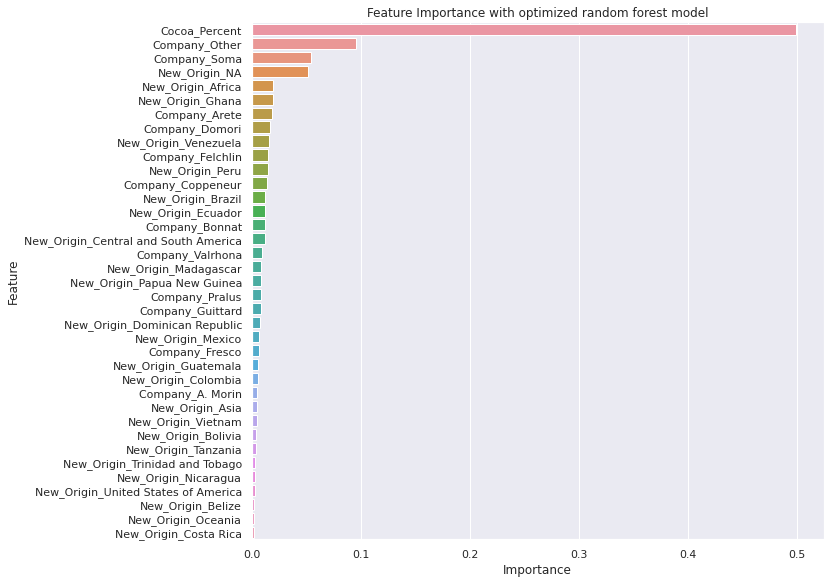

In [ ]:
import seaborn as sns

# Create a dataframe to store the feature importance using the optimized decision tree model

feature_importance_odtm = pd.DataFrame({"Feature": X_train.columns,
                                    "Importance": optimized_dtm.feature_importances_})

# Sort the dataframe by the importance

feature_importance_odtm.sort_values(by = "Importance", ascending = False)

# Create a dataframe to store the feature importance using the optimized random forest model

feature_importance_orfm = pd.DataFrame({"Feature": X_train.columns,
                                    "Importance": optimized_rfm.feature_importances_})

# Sort the dataframe by the importance

feature_importance_orfm.sort_values(by = "Importance", ascending = False)

# Plot the entire feature importance decision process using the optimized decision tree model with seaborn

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = "Importance", y = "Feature", data = feature_importance_odtm.sort_values(by = "Importance", ascending = False))
plt.title('Feature Importance with optimized decision tree model')
plt.tight_layout()
plt.show()

# Plot the entire feature importance decision process using the optimized random forest model with seaborn

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = "Importance", y = "Feature", data = feature_importance_orfm.sort_values(by = "Importance", ascending = False))
plt.title('Feature Importance with optimized random forest model')
plt.tight_layout()

# Print out the top 3 columns that will have the greatest impact on chocolate bar ratings prediction

print("The top 3 columns that will have the greatest impact on chocolate bar ratings prediction using the optimized decision tree model are: \n")
print(feature_importance_odtm.sort_values(by = "Importance", ascending = False).head(3))
print("\n")